# Inicializações

In [1]:
url = "http://vps-40d69db1.vps.ovh.ca:21446/api/CotacaoIntradayAcaoResultadoValors/obtemPorRegraData?idRegra=1&diaNum=20210101"

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Execuções

Data :  04/01/2022 15:45:30
Total:  207938
Ticker:  73


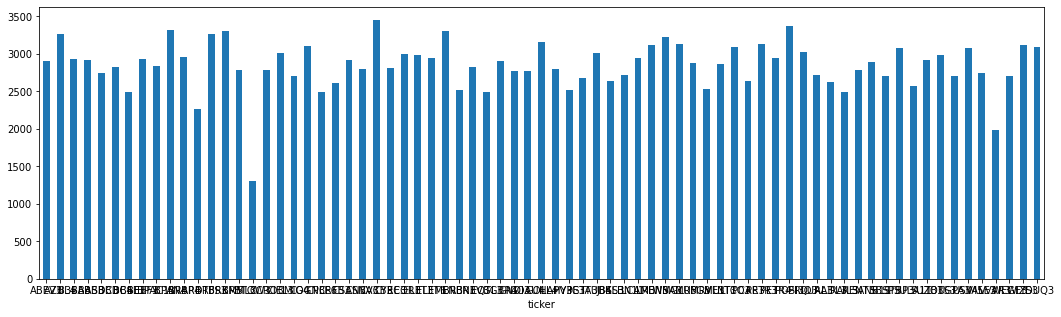

   ticker  total
0   ABEV3   2910
1   AZUL4   3266
2   B3SA3   2936
3   BBAS3   2921
4   BBDC3   2748
..    ...    ...
68  VALE3   2744
69  VVAR3   1990
70  WEGE3   2705
71  WIZS3   3116
72  YDUQ3   3096

[73 rows x 2 columns]


In [3]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)
dfTicker = df.groupby(['ticker']).agg('qtde').sum().reset_index(name ='total')

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

print('Data : ' , dt_string)
print('Total: ' , df.agg('qtde').sum())
print('Ticker: ' , len(dfTicker))


dfTicker.plot.bar(x='ticker', y='total', rot=0, figsize=(18,5), legend=None)
plt.show()

print(dfTicker)

In [4]:
type(dfTicker)

pandas.core.frame.DataFrame

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns

Index(['ticker', 'resultado', 'qtde'], dtype='object')

# Como colocar percentual por ticker ???

In [7]:
df.head()

,ticker,resultado,qtde
0,ABEV3,-1,340
1,ABEV3,0,1633
2,ABEV3,1,937
3,AZUL4,-1,1749
4,AZUL4,0,408


In [8]:
dfABEV3 = df.loc[df.ticker.isin(['ABEV3','B3SA3'])]

In [9]:
dfABEV3.head()

,ticker,resultado,qtde
0,ABEV3,-1,340
1,ABEV3,0,1633
2,ABEV3,1,937
6,B3SA3,-1,1879
7,B3SA3,0,1057


In [10]:

dfABEV3['percentual'] = (dfABEV3['qtde'] / 
                      dfABEV3['qtde'].sum()) * 100

/tmp/ipykernel_4711/4215313444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfABEV3['percentual'] = (dfABEV3['qtde'] /


In [11]:
dfABEV3.head()

,ticker,resultado,qtde,percentual
0,ABEV3,-1,340,5.815943
1,ABEV3,0,1633,27.933630
2,ABEV3,1,937,16.028053
6,B3SA3,-1,1879,32.141635
7,B3SA3,0,1057,18.080739


# Exemplo com o que eu quero (31-12-2021)

In [16]:
import numpy as np
import pandas as pd
np.random.seed(0)
df = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
               'office_id': list(range(1, 7)) * 2,
               'sales': [np.random.randint(100000, 999999) for _ in range(12)]})

state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
state = df.groupby(['state']).agg({'sales': 'sum'})
state_office.div(state, level='state') * 100

sales
state office_id           
AZ    2          16.981365
      4          19.250033
      6          63.768601
CA    1          19.331879
      3          33.858747
      5          46.809373
CO    1          36.851857
      3          19.874290
      5          43.273852
WA    2          34.707233
      4          35.511259
      6          29.781508

In [17]:
state

,sales
state,
AZ,1310725
CA,2098663
CO,1096653
WA,1543854


In [24]:
df

,state,office_id,sales
0,CA,1,405711
1,WA,2,535829
2,CO,3,217952
3,AZ,4,252315
4,CA,5,982371
5,WA,6,459783
6,CO,1,404137
7,AZ,2,222579
8,CA,3,710581
9,WA,4,548242


In [25]:
state_office

sales
state office_id        
AZ    2          222579
      4          252315
      6          835831
CA    1          405711
      3          710581
      5          982371
CO    1          404137
      3          217952
      5          474564
WA    2          535829
      4          548242
      6          459783

In [12]:
agrupado_por_ticker = df.groupby(['ticker', 'resultado']).agg({'qtde': 'sum'})
agrupado_por_ticker.head()

qtde
ticker resultado      
ABEV3  -1          340
        0         1633
        1          937
AZUL4  -1         1749
        0          408

In [13]:
ticker = df.groupby(['ticker']).agg({'qtde': 'sum'})
ticker.head()

,qtde
ticker,
ABEV3,2910
AZUL4,3266
B3SA3,2936
BBAS3,2921
BBDC3,2748


In [18]:
agrupado_por_ticker.div(ticker, level='ticker') * 100

qtde
ticker resultado           
ABEV3  -1         11.683849
        0         56.116838
        1         32.199313
AZUL4  -1         53.551745
        0         12.492345
...                     ...
WIZS3  -1         58.825417
        1         41.174583
YDUQ3  -1         61.369509
        0          6.847545
        1         31.782946

[216 rows x 1 columns]

In [19]:
dfCompra = agrupado_por_ticker.sort_values(by='qtde', ascending=False).head(10)

In [20]:
dfCompra

,,qtde
ticker,resultado,
EMBR3,1,2536
MGLU3,-1,2254
LWSA3,-1,2250
KLBN11,0,2219
BRKM5,1,2215
ENBR3,0,2143
CVCB3,-1,2109
POSI3,1,2033
ECOR3,-1,1969
